In [1]:
#The Goal of this notebook is to Predict Future Flight Delays. This is done using an Airline dataset that was found online. 

In [2]:
#Import Libraries and convert CSV to Dataframe
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\kenny\Downloads\archive\Airlines.csv')

In [3]:
#Check null values
df.isnull().values.any()

False

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts(),'\n')
    print('********************************************\n')

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64 

********************************************

16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: Flight, Length: 6585, dtype: int64 

********************************************

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64 

********************************************

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64 

********************************************

4    91445
3    8

In [7]:
#Cleaning Up Days of Week Values
df["DayOfWeek"] = df["DayOfWeek"].replace([1,2,3,4,5,6,7],['Mon','Tues', 'Wed','Thurs','Fri','Sat','Sun'])


In [8]:
#Fixing Time to Hours
df['Time_Hours'] = df['Time'] / 60

In [9]:
#Creating a General range for Time field
departure_period = []
for i in range(0,len(df)):
    if ((df['Time_Hours'][i] >= 5) & (df['Time_Hours'][i] < 12)):      
        departure_period.append('Morning')
    elif ((df['Time_Hours'][i] >= 12) & (df['Time_Hours'][i] < 17)):    
        departure_period.append('Afternoon')
    elif ((df['Time_Hours'][i] >= 17) & (df['Time_Hours'][i] < 21)): 
        departure_period.append('Evening')
    else: 
        departure_period.append('Night')

df['Departure_period'] = departure_period

In [10]:
df = df.drop(columns=['Time','Time_Hours'])

In [11]:
df.drop_duplicates()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Delay,Departure_period
0,CO,269,SFO,IAH,Wed,205,1,Night
1,US,1558,PHX,CLT,Wed,222,1,Night
2,AA,2400,LAX,DFW,Wed,165,1,Night
3,AA,2466,SFO,DFW,Wed,195,1,Night
4,AS,108,ANC,SEA,Wed,202,0,Night
...,...,...,...,...,...,...,...,...
539357,CO,434,PHX,EWR,Fri,259,1,Night
539363,DL,1002,SLC,JFK,Fri,264,1,Night
539365,US,119,KOA,PHX,Fri,349,1,Night
539374,DL,2354,LAX,ATL,Fri,255,0,Night


In [60]:
df['DayAndTime'] = df[['DayOfWeek','Departure_period']].apply("-".join,axis=1)

In [61]:
#So We're checking for Delayed flights to see if there's any correlation, let's make a dataframe containing only delayed flights
df_delayed = df[df.Delay == 1]
df_delayed

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Delay,Departure_period,DayAndTime
0,CO,269,SFO,IAH,Wed,205,1,Night,Wed-Night
1,US,1558,PHX,CLT,Wed,222,1,Night,Wed-Night
2,AA,2400,LAX,DFW,Wed,165,1,Night,Wed-Night
3,AA,2466,SFO,DFW,Wed,195,1,Night,Wed-Night
5,CO,1094,LAX,IAH,Wed,181,1,Night,Wed-Night
...,...,...,...,...,...,...,...,...,...
539373,B6,480,LAX,BOS,Fri,320,1,Night,Fri-Night
539376,B6,717,JFK,SJU,Fri,220,1,Night,Fri-Night
539377,B6,739,JFK,PSE,Fri,223,1,Night,Fri-Night
539381,UA,78,HNL,SFO,Fri,313,1,Night,Fri-Night


In [62]:
#We can delete the Delay Column
df_delayed.drop(columns = ['Delay'])

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Departure_period,DayAndTime
0,CO,269,SFO,IAH,Wed,205,Night,Wed-Night
1,US,1558,PHX,CLT,Wed,222,Night,Wed-Night
2,AA,2400,LAX,DFW,Wed,165,Night,Wed-Night
3,AA,2466,SFO,DFW,Wed,195,Night,Wed-Night
5,CO,1094,LAX,IAH,Wed,181,Night,Wed-Night
...,...,...,...,...,...,...,...,...
539373,B6,480,LAX,BOS,Fri,320,Night,Fri-Night
539376,B6,717,JFK,SJU,Fri,220,Night,Fri-Night
539377,B6,739,JFK,PSE,Fri,223,Night,Fri-Night
539381,UA,78,HNL,SFO,Fri,313,Night,Fri-Night


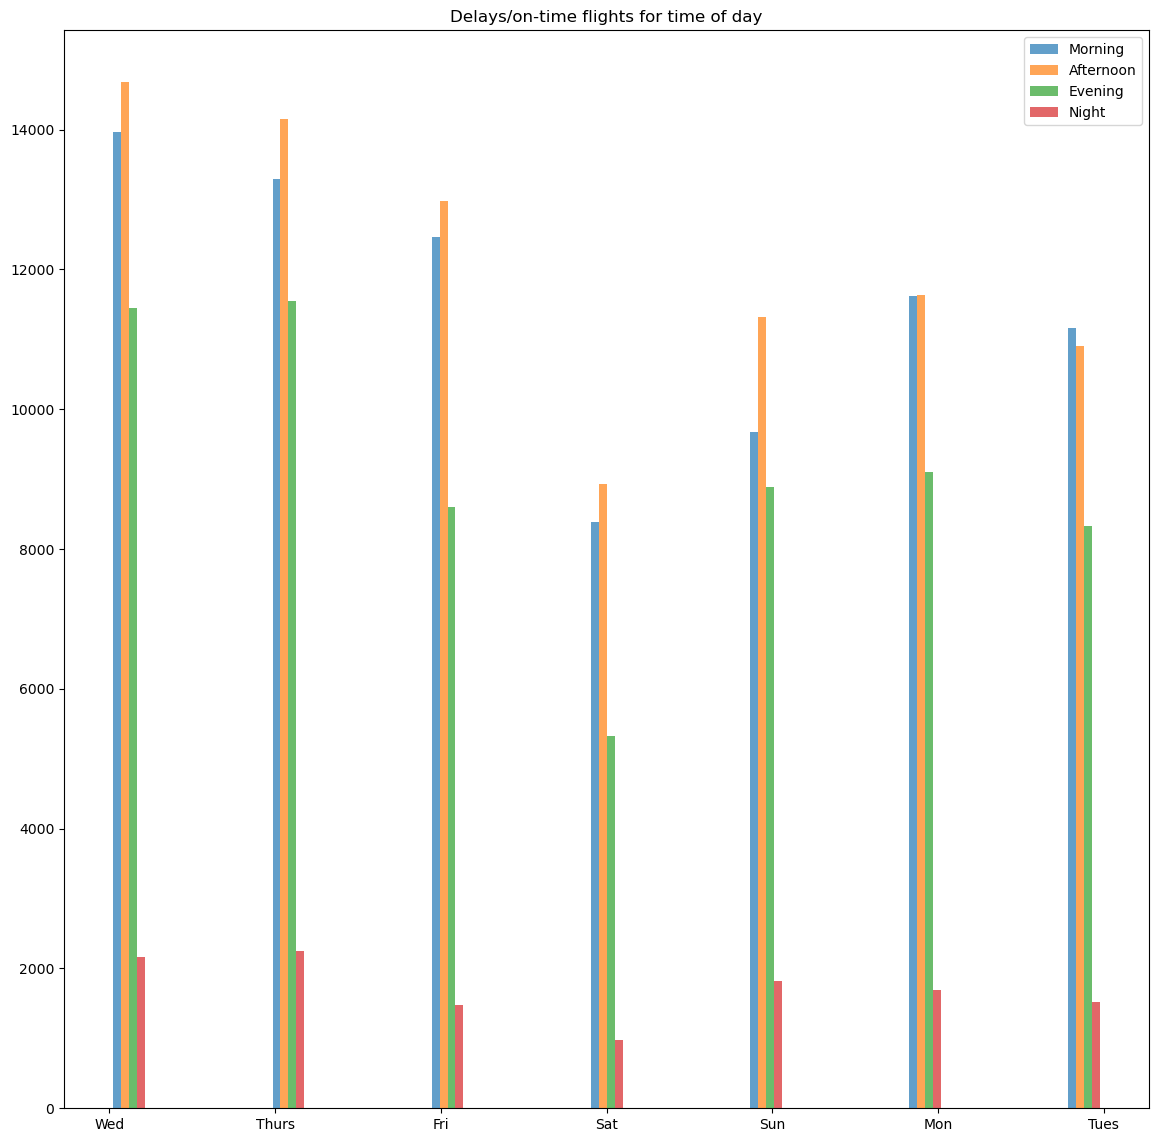

In [63]:
#Curious to see which times were most delayed
#Start by checking the departure periods. 
fig, (ax1) = plt.subplots(1)
ax1.hist([df_delayed["DayOfWeek"][df_delayed["Departure_period"] == 'Morning'], df_delayed["DayOfWeek"][df_delayed["Departure_period"] == 'Afternoon'], df_delayed["DayOfWeek"][df_delayed["Departure_period"] == 'Evening'], df_delayed["DayOfWeek"][df_delayed["Departure_period"] == 'Night']], 25, alpha = .7, histtype='bar', label=["Morning","Afternoon","Evening","Night"])
ax1.set_title("Delays/on-time flights for time of day")
ax1.legend()


fig.set_size_inches(14,14)

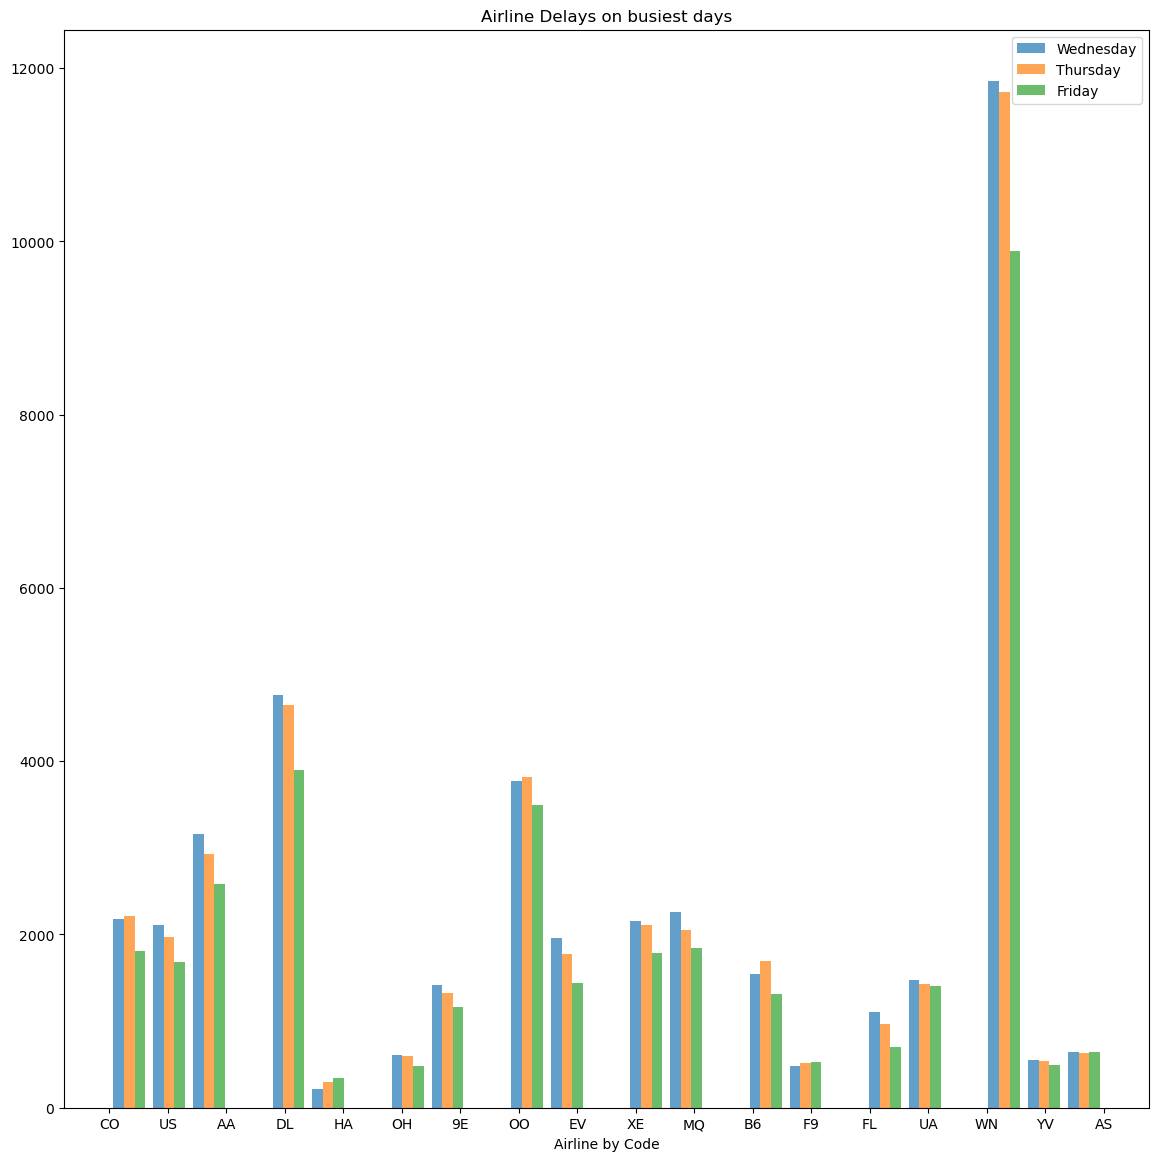

In [64]:
#Looks like Wednesday, Thursday, Friday
#What about the airlines
fig, (ax2)=plt.subplots(1)

ax2.hist([df_delayed["Airline"][df_delayed["DayOfWeek"] == 'Wed'], df_delayed["Airline"][df_delayed["DayOfWeek"] == 'Thurs'], df_delayed["Airline"][df_delayed["DayOfWeek"] == 'Fri']], 25, alpha = .7, histtype='bar', label=["Wednesday","Thursday","Friday"])
ax2.set(xlabel="Airline by Code")
ax2.set_title("Airline Delays on busiest days")
ax2.legend()

fig.set_size_inches(14,14)

In [66]:
#Shows the dataset is skewed towards code WN or Southwest Airlines. I'd like to get a picture of Southwest and see if a correlation can be made
df_south = df_delayed[['Airline','DayAndTime']]
df_south

,Airline,DayAndTime
0,CO,Wed-Night
1,US,Wed-Night
2,AA,Wed-Night
3,AA,Wed-Night
5,CO,Wed-Night
...,...,...
539373,B6,Fri-Night
539376,B6,Fri-Night
539377,B6,Fri-Night
539381,UA,Fri-Night


In [67]:
df_south = df_south[df_south.Airline == 'WN']
df_south


,Airline,DayAndTime
474,WN,Wed-Morning
478,WN,Wed-Morning
480,WN,Wed-Morning
481,WN,Wed-Morning
484,WN,Wed-Morning
...,...,...
538749,WN,Fri-Evening
538782,WN,Fri-Evening
538809,WN,Fri-Evening
538832,WN,Fri-Evening


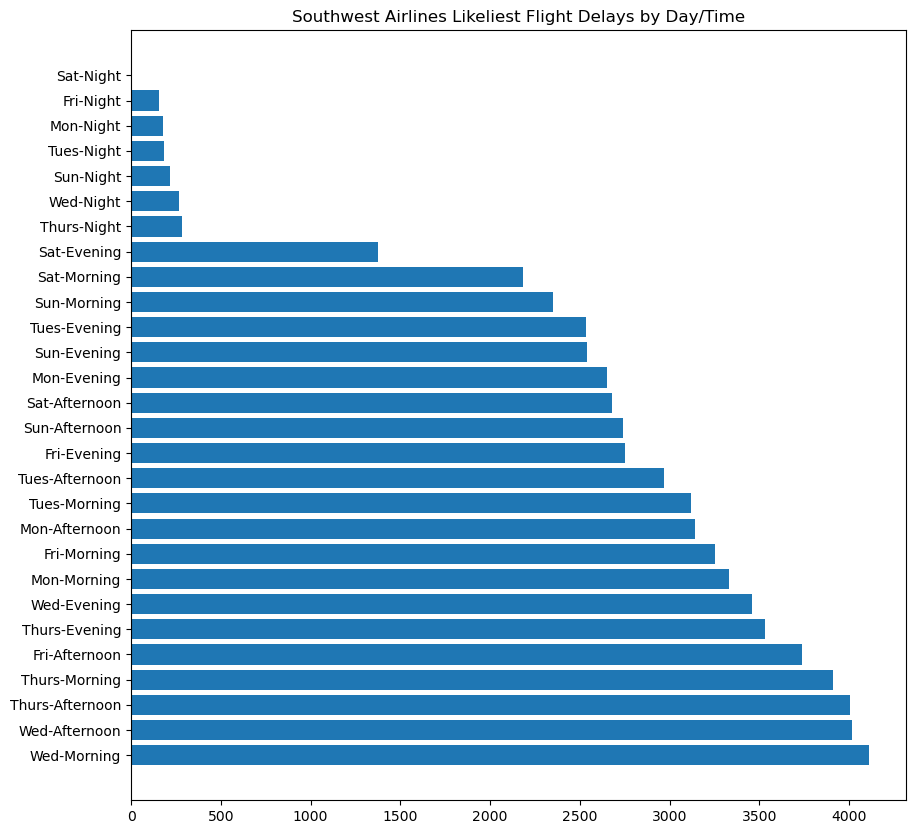

In [85]:
num = df_south['DayAndTime'].value_counts().values
word = df_south['DayAndTime'].value_counts().index


plt.barh(word,num)
plt.title("Southwest Airlines Likeliest Flight Delays by Day/Time")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()